In [2]:
!pip install tensorflow

In [3]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

# Function to extract metadata for each image
def extract_metadata(root_folder):
    image_metadata = []
    for root, dirs, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other image formats if needed
                image_path = os.path.join(root, filename)
                label = os.path.basename(os.path.dirname(image_path))
                image_name = os.path.basename(image_path)
                image_size = os.path.getsize(image_path)
                image_metadata.append([image_name, label, image_size, image_path])
    return image_metadata

# Specify root folder path of your image dataset
root_folder = "/content/drive/MyDrive/f3000"

# Extract metadata for each image in the folder
metadata = extract_metadata(root_folder)

# Print metadata for each image
for image_data in metadata:
    print("Image Name:", image_data[0])
    print("Label:", image_data[1])
    print("Size:", image_data[2])
    print("Image Path:", image_data[3])
    print("-----------------------------------")

Streaming output truncated to the last 5000 lines.
Image Name: gg (313).jpg
Label: glioma_tumor
Size: 23953
Image Path: /content/drive/MyDrive/f3000/Training/glioma_tumor/gg (313).jpg
-----------------------------------
Image Name: gg (291).jpg
Label: glioma_tumor
Size: 25747
Image Path: /content/drive/MyDrive/f3000/Training/glioma_tumor/gg (291).jpg
-----------------------------------
Image Name: gg (282).jpg
Label: glioma_tumor
Size: 22237
Image Path: /content/drive/MyDrive/f3000/Training/glioma_tumor/gg (282).jpg
-----------------------------------
Image Name: gg (336).jpg
Label: glioma_tumor
Size: 25299
Image Path: /content/drive/MyDrive/f3000/Training/glioma_tumor/gg (336).jpg
-----------------------------------
Image Name: gg (329).jpg
Label: glioma_tumor
Size: 19545
Image Path: /content/drive/MyDrive/f3000/Training/glioma_tumor/gg (329).jpg
-----------------------------------
Image Name: gg (321).jpg
Label: glioma_tumor
Size: 22764
Image Path: /content/drive/MyDrive/f3000/Traini

In [5]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [6]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [7]:
tr_df = train_df('/content/drive/MyDrive/f3000/Training')

In [8]:
tr_df

,Class Path,Class
0,/content/drive/MyDrive/f3000/Training/meningio...,meningioma_tumor
1,/content/drive/MyDrive/f3000/Training/meningio...,meningioma_tumor
2,/content/drive/MyDrive/f3000/Training/meningio...,meningioma_tumor
3,/content/drive/MyDrive/f3000/Training/meningio...,meningioma_tumor
4,/content/drive/MyDrive/f3000/Training/meningio...,meningioma_tumor
...,...,...
2865,/content/drive/MyDrive/f3000/Training/glioma_t...,glioma_tumor
2866,/content/drive/MyDrive/f3000/Training/glioma_t...,glioma_tumor
2867,/content/drive/MyDrive/f3000/Training/glioma_t...,glioma_tumor
2868,/content/drive/MyDrive/f3000/Training/glioma_t...,glioma_tumor


In [9]:

import os
import pandas as pd

# Function to extract metadata for each image
def extract_metadata(root_folder):
    image_metadata = []
    for root, dirs, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other image formats if needed
                image_path = os.path.join(root, filename)
                label = os.path.basename(os.path.dirname(image_path))
                image_name = os.path.basename(image_path)
                image_size = os.path.getsize(image_path)
                original_image_path = os.path.join(root, filename)  # Include original image path
                image_metadata.append([image_name, label, image_size, image_path, original_image_path])  # Add original_image_path
    return image_metadata

# Specify root folder path of your image dataset
root_folder = "/content/drive/MyDrive/f3000/Training"

# Extract metadata for each image in the folder
metadata = extract_metadata(root_folder)

# Create a DataFrame from the metadata
columns = ['Image_Name', 'Label', 'Size', 'Image_Path', 'Original_Image_Path']  # Define column names
df = pd.DataFrame(metadata, columns=columns)

# Specify CSV file path
csv_file_path = "/content/drive/MyDrive/f3000/training.csv"

# Save DataFrame to CSV file
df.to_csv(csv_file_path, index=False)

print("Metadata CSV file saved successfully at:", csv_file_path)

Metadata CSV file saved successfully at: /content/drive/MyDrive/f3000/training.csv


In [10]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.9 MB/s eta 0:00:00


Column Names: Index(['Image_Name', 'Label', 'Size', 'Image_Path', 'Original_Image_Path'], dtype='object')


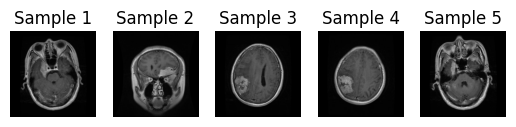

In [11]:

import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Read CSV file and print column names
df = pd.read_csv("/content/drive/MyDrive/f3000/training.csv")
print("Column Names:", df.columns)

# Assuming the column containing image paths is named 'ImagePath' (adjust accordingly)
image_paths_column = 'Original_Image_Path'

# Extract image paths
image_paths = df[image_paths_column]

# Number of samples to display
num_samples = 5

# Display images
for i, image_path in enumerate(image_paths[:num_samples]):
    # Load image using SimpleITK
    image = sitk.ReadImage(image_path)

    # Convert image to NumPy array for visualization
    img_array = sitk.GetArrayFromImage(image)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img_array, cmap='gray')  # Display the 2D image
    plt.title(f'Sample {i+1}')
    plt.axis('off')

plt.show()

In [12]:
ts_df = test_df('/content/drive/MyDrive/f3000/Testing')

In [13]:
ts_df

,Class Path,Class
0,/content/drive/MyDrive/f3000/Testing/glioma_tu...,glioma_tumor
1,/content/drive/MyDrive/f3000/Testing/glioma_tu...,glioma_tumor
2,/content/drive/MyDrive/f3000/Testing/glioma_tu...,glioma_tumor
3,/content/drive/MyDrive/f3000/Testing/glioma_tu...,glioma_tumor
4,/content/drive/MyDrive/f3000/Testing/glioma_tu...,glioma_tumor
...,...,...
399,/content/drive/MyDrive/f3000/Testing/no_tumor/...,no_tumor
400,/content/drive/MyDrive/f3000/Testing/no_tumor/...,no_tumor
401,/content/drive/MyDrive/f3000/Testing/no_tumor/...,no_tumor
402,/content/drive/MyDrive/f3000/Testing/no_tumor/...,no_tumor


In [14]:
import os
import pandas as pd

# Function to extract metadata for each image
def extract_metadata(root_folder):
    image_metadata = []
    for root, dirs, files in os.walk(root_folder):
        for filename in files:
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other image formats if needed
                image_path = os.path.join(root, filename)
                label = os.path.basename(os.path.dirname(image_path))
                image_name = os.path.basename(image_path)
                image_size = os.path.getsize(image_path)
                original_image_path = os.path.join(root, filename)  # Include original image path
                image_metadata.append([image_name, label, image_size, image_path, original_image_path])  # Add original_image_path
    return image_metadata

# Specify root folder path of your image dataset
root_folder = "/content/drive/MyDrive/f3000/Testing"

# Extract metadata for each image in the folder
metadata = extract_metadata(root_folder)

# Create a DataFrame from the metadata
columns = ['Image_Name', 'Label', 'Size', 'Image_Path', 'Original_Image_Path']  # Define column names
df = pd.DataFrame(metadata, columns=columns)

# Specify CSV file path
csv_file_path = "/content/drive/MyDrive/f3000/testing.csv"

# Save DataFrame to CSV file
df.to_csv(csv_file_path, index=False)

print("Metadata CSV file saved successfully at:", csv_file_path)

Metadata CSV file saved successfully at: /content/drive/MyDrive/f3000/testing.csv


Column Names: Index(['Image_Name', 'Label', 'Size', 'Image_Path', 'Original_Image_Path'], dtype='object')


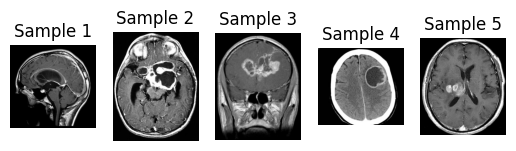

In [15]:
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Read CSV file and print column names
df = pd.read_csv("/content/drive/MyDrive/f3000/testing.csv")
print("Column Names:", df.columns)

# Assuming the column containing image paths is named 'ImagePath' (adjust accordingly)
image_paths_column = 'Original_Image_Path'

# Extract image paths
image_paths = df[image_paths_column]

# Number of samples to display
num_samples = 5

# Display images
for i, image_path in enumerate(image_paths[:num_samples]):
    # Load image using SimpleITK
    image = sitk.ReadImage(image_path)

    # Convert image to NumPy array for visualization
    img_array = sitk.GetArrayFromImage(image)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img_array, cmap='gray')  # Display the 2D image
    plt.title(f'Sample {i+1}')
    plt.axis('off')

plt.show()

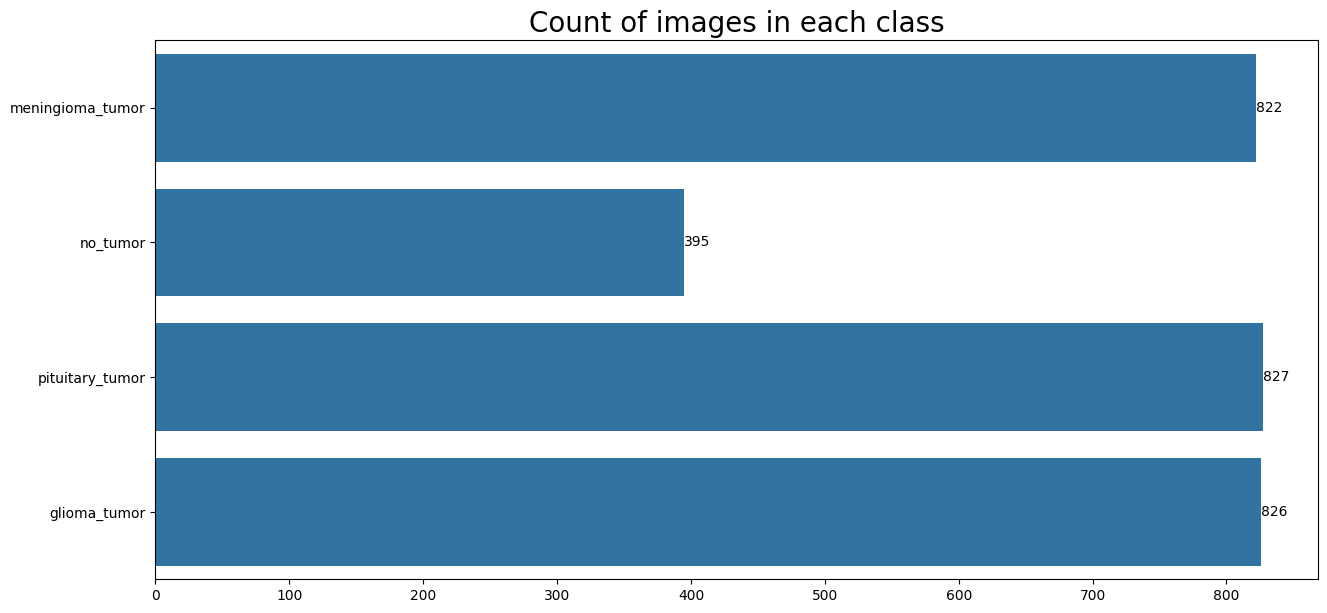

In [16]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()


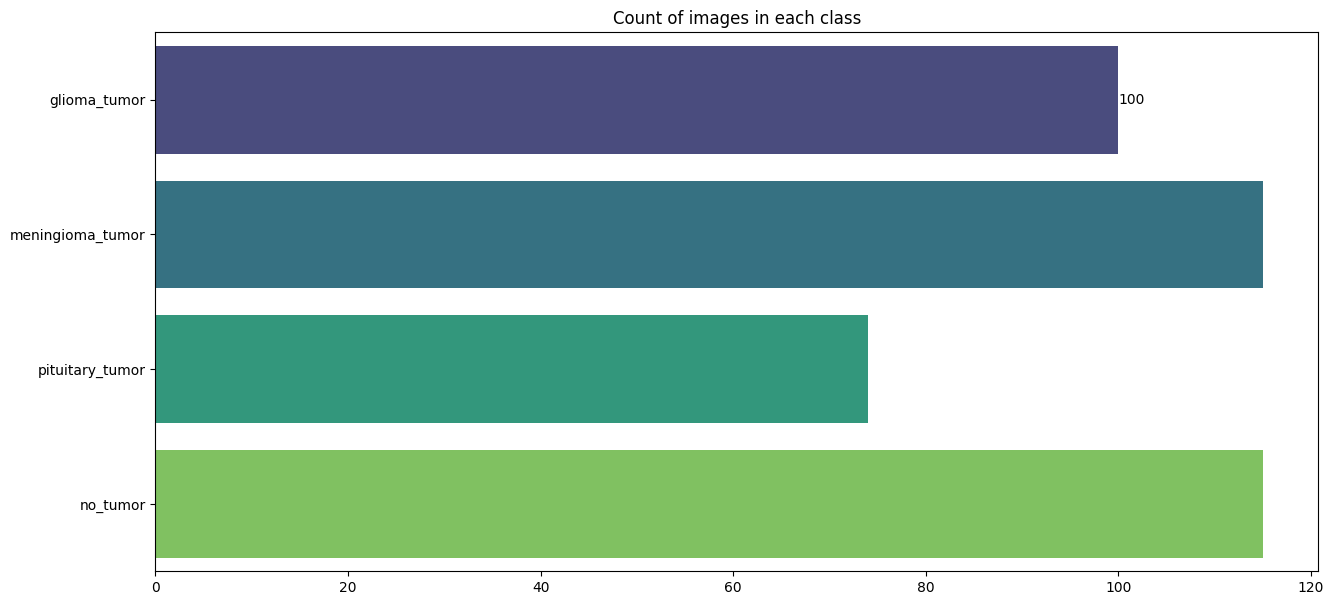

In [17]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [18]:
!pip install itk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 54.2 MB/s eta 0:00:00


In [19]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(df, train_size=0.8, random_state=42)

validation_data.to_csv('/content/drive/MyDrive/f3000/validation_data.csv', index=False)


In [20]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [21]:
valid_df

,Class Path,Class
107,/content/drive/MyDrive/f3000/Testing/meningiom...,meningioma_tumor
148,/content/drive/MyDrive/f3000/Testing/meningiom...,meningioma_tumor
19,/content/drive/MyDrive/f3000/Testing/glioma_tu...,glioma_tumor
387,/content/drive/MyDrive/f3000/Testing/no_tumor/...,no_tumor
282,/content/drive/MyDrive/f3000/Testing/pituitary...,pituitary_tumor
...,...,...
242,/content/drive/MyDrive/f3000/Testing/pituitary...,pituitary_tumor
4,/content/drive/MyDrive/f3000/Testing/glioma_tu...,glioma_tumor
39,/content/drive/MyDrive/f3000/Testing/glioma_tu...,glioma_tumor
288,/content/drive/MyDrive/f3000/Testing/pituitary...,pituitary_tumor


In [22]:




import pandas as pd
import itk
import numpy as np
import cv2

# Function to resize image
def resize_image(image, output_size):
    return cv2.resize(image, output_size)

# Function to apply Z-score normalization
def z_score_normalization(image):
    img_array = np.array(image)
    mean = np.mean(img_array)
    std_dev = np.std(img_array)
    normalized_img = (img_array - mean) / std_dev
    return normalized_img

# Function to handle missing values by mean imputation
def handle_missing_values(dataframe):
    dataframe.fillna(dataframe.mean(numeric_only=True), inplace=True)
    return dataframe

# Function to load image using N4ITK
def load_image(image_path):
    image = itk.imread(image_path)
    return image

# Read CSV files containing image paths and metadata for training, testing, and validation
train_df = pd.read_csv("/content/drive/MyDrive/f3000/training.csv")
test_df = pd.read_csv("/content/drive/MyDrive/f3000/testing.csv")
validation_df = pd.read_csv("/content/drive/MyDrive/f3000/validation_data.csv")

# Function to preprocess data
def preprocess_data(df):
    # Extract image paths
    image_paths = df['Original_Image_Path']

    # Initialize lists to store preprocessed image paths and metadata
    preprocessed_image_paths = []
    metadata = []  # Add any additional metadata here if needed

    # Load, resize, normalize, and handle missing values for each image
    for image_path in image_paths:
        # Load image using N4ITK
        image = load_image(image_path)
        # Convert N4ITK image to NumPy array
        image_array = itk.GetArrayFromImage(image)
        # Resize image using OpenCV
        resized_image = resize_image(image_array, output_size=(224, 224))
        # Apply Z-score normalization
        normalized_image = z_score_normalization(resized_image)
        # Handle missing values in dataframe
        df = handle_missing_values(df)

        # Perform any other preprocessing steps as needed

        # Generate new path for preprocessed image (Example: Adding 'preprocessed/' prefix)
        preprocessed_path = 'preprocessed/' + image_path.split('/')[-1]  # Modify path generation as per your requirement
        preprocessed_image_paths.append(preprocessed_path)

        # Append metadata for preprocessed image (Example: Append label)
        metadata.append(df.loc[df['Original_Image_Path'] == image_path, 'Label'].values[0])  # Add label or any other metadata as needed

    # Create DataFrame for preprocessed data
    preprocessed_df = pd.DataFrame({'Original_Image_Path': image_paths, 'Preprocessed_Image_Path': preprocessed_image_paths, 'Label': metadata})  # Add more columns as needed

    return preprocessed_df

# Preprocess training, testing, and validation data
preprocessed_train_df = preprocess_data(train_df)
preprocessed_test_df = preprocess_data(test_df)
preprocessed_validation_df = preprocess_data(validation_df)

# Save preprocessed data to CSV files
preprocessed_train_df.to_csv("/content/drive/MyDrive/f3000/preprocessed_train.csv", index=False)
preprocessed_test_df.to_csv("/content/drive/MyDrive/f3000/preprocessed_test.csv", index=False)
preprocessed_validation_df.to_csv("/content/drive/MyDrive/f3000/preprocessed_validation.csv", index=False)

print("Preprocessed data saved to CSV files successfully!")







Preprocessed data saved to CSV files successfully!


In [23]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)


Found 2870 validated image filenames belonging to 4 classes.
Found 202 validated image filenames belonging to 4 classes.
Found 202 validated image filenames belonging to 4 classes.


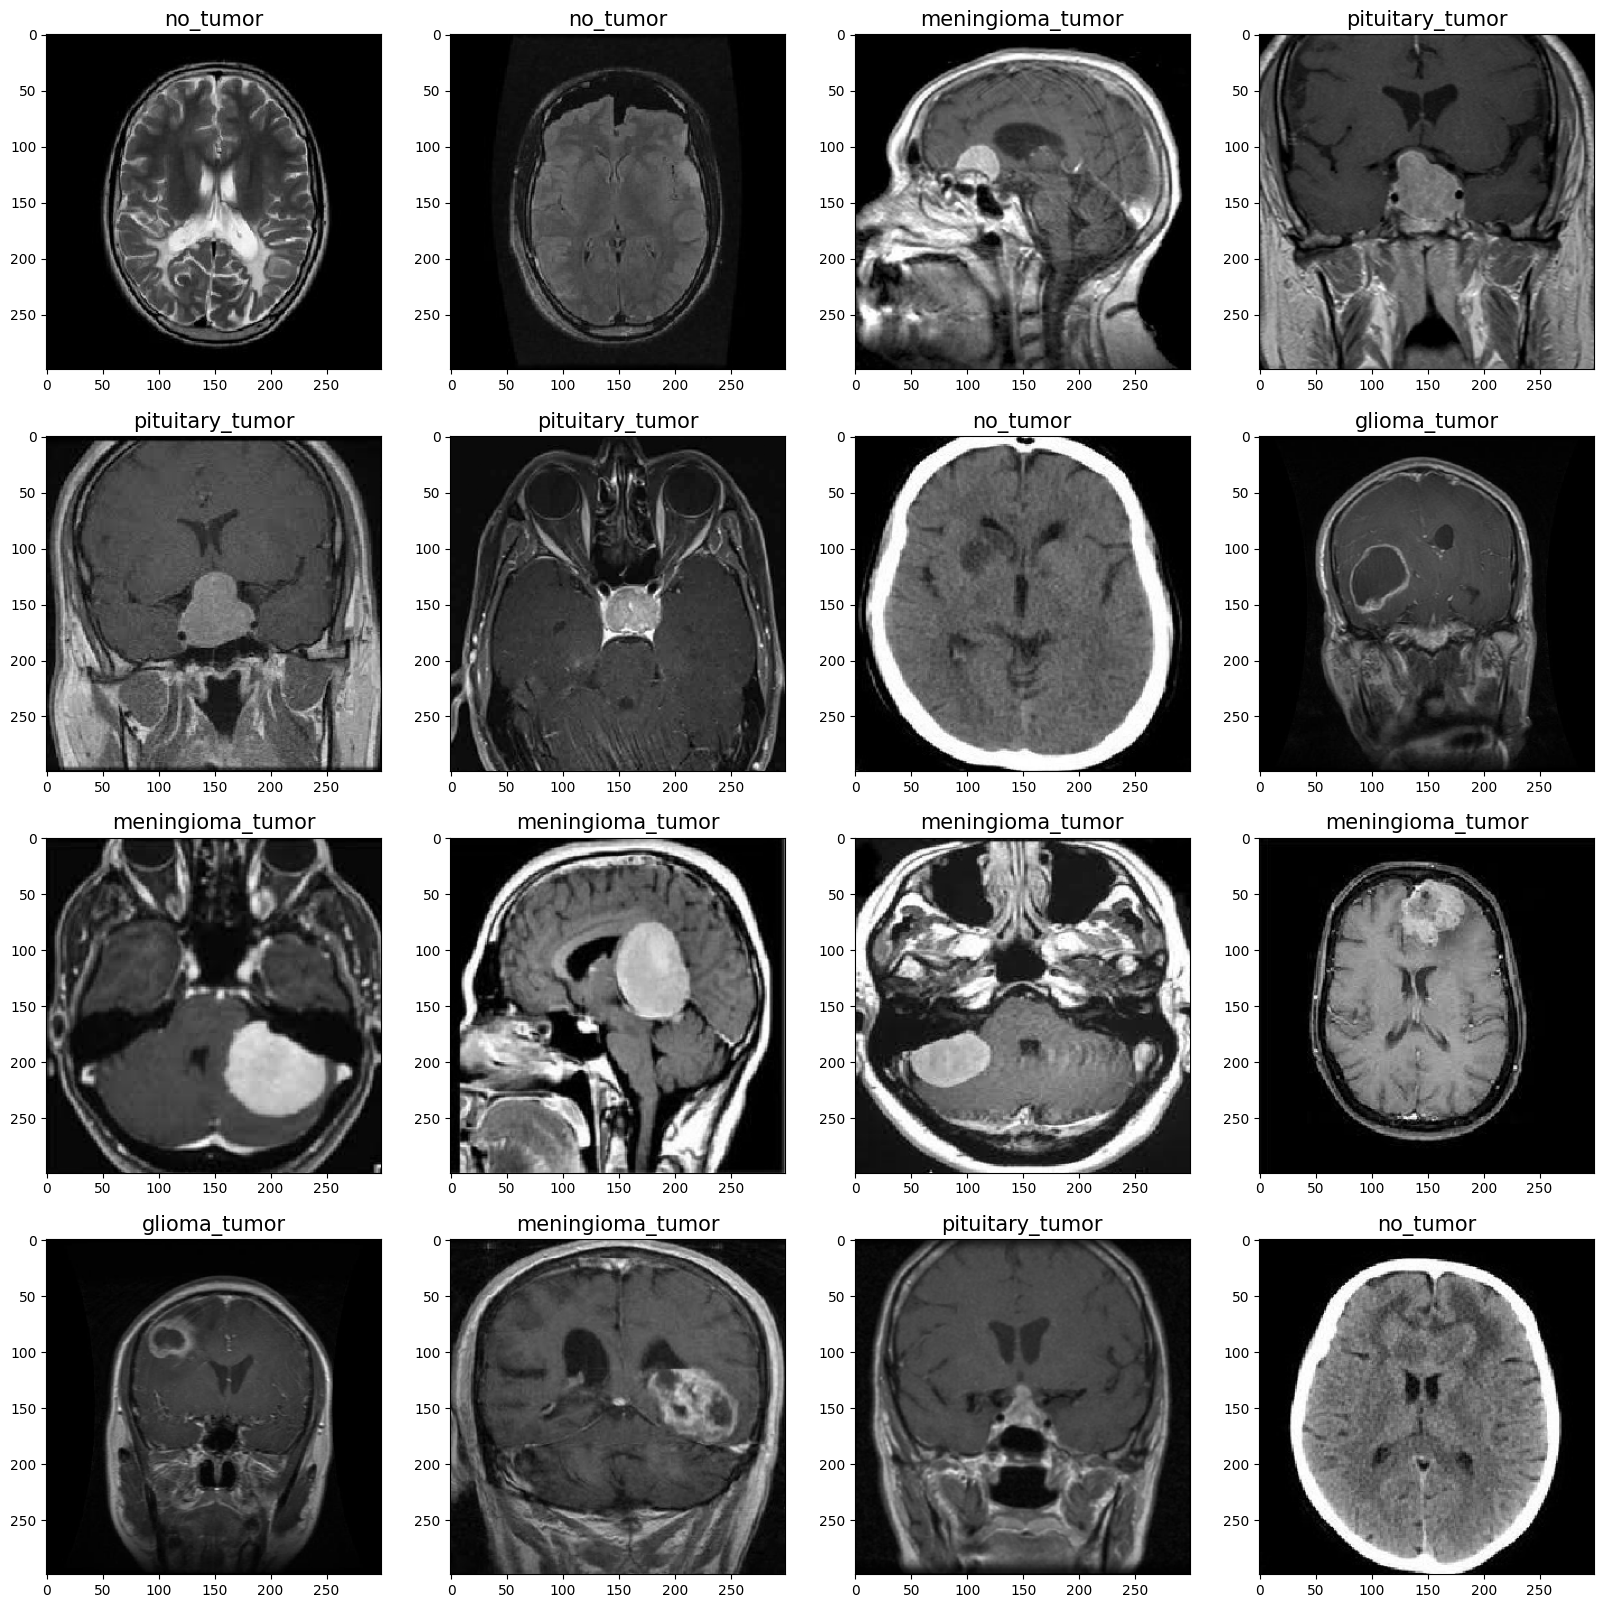

In [24]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

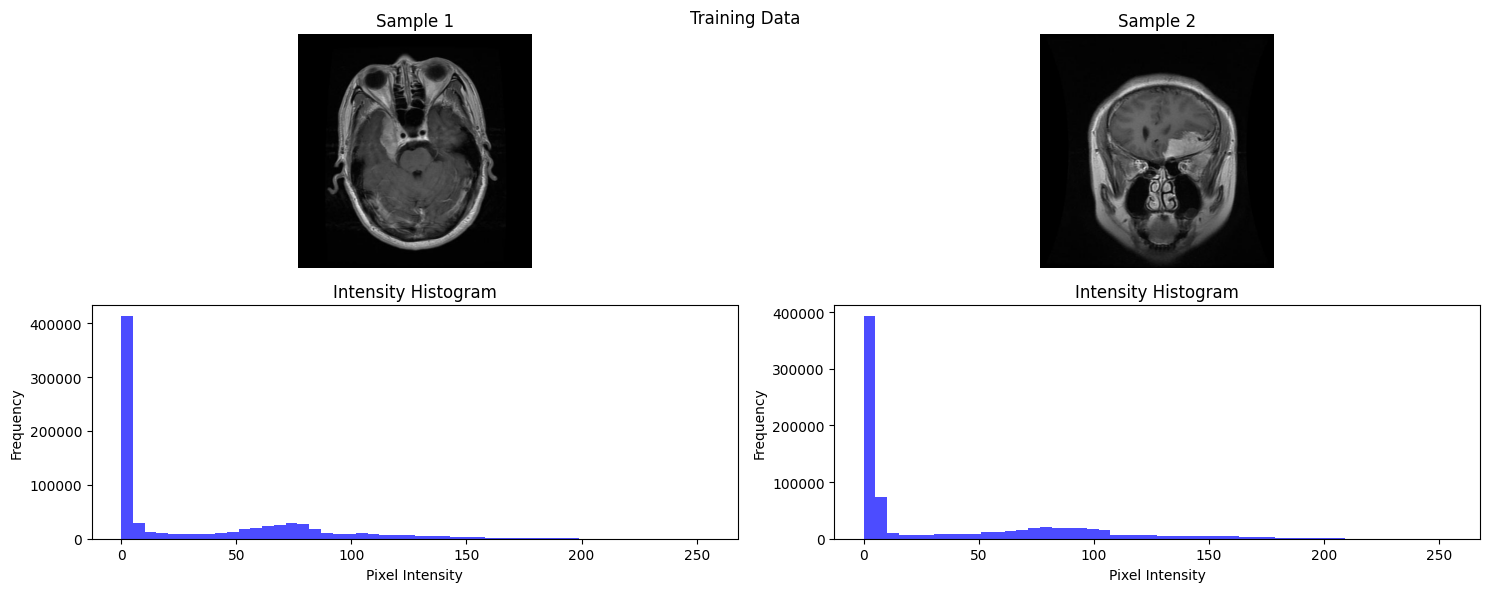

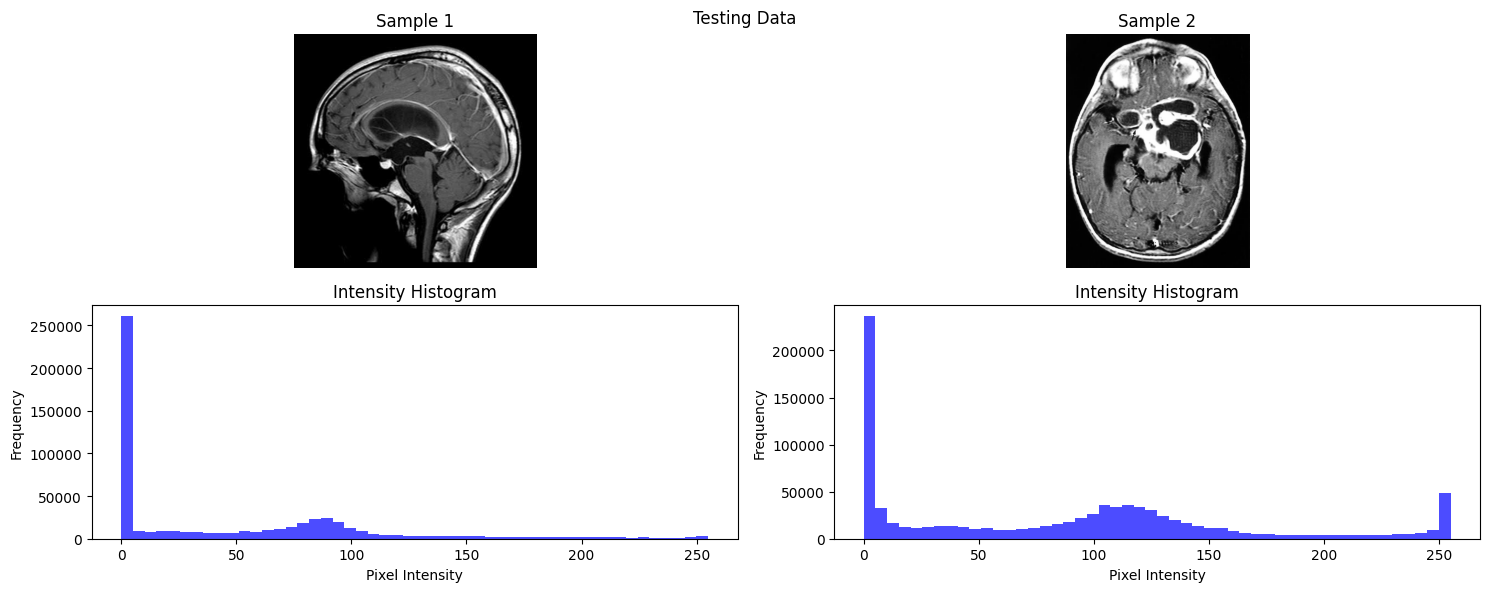

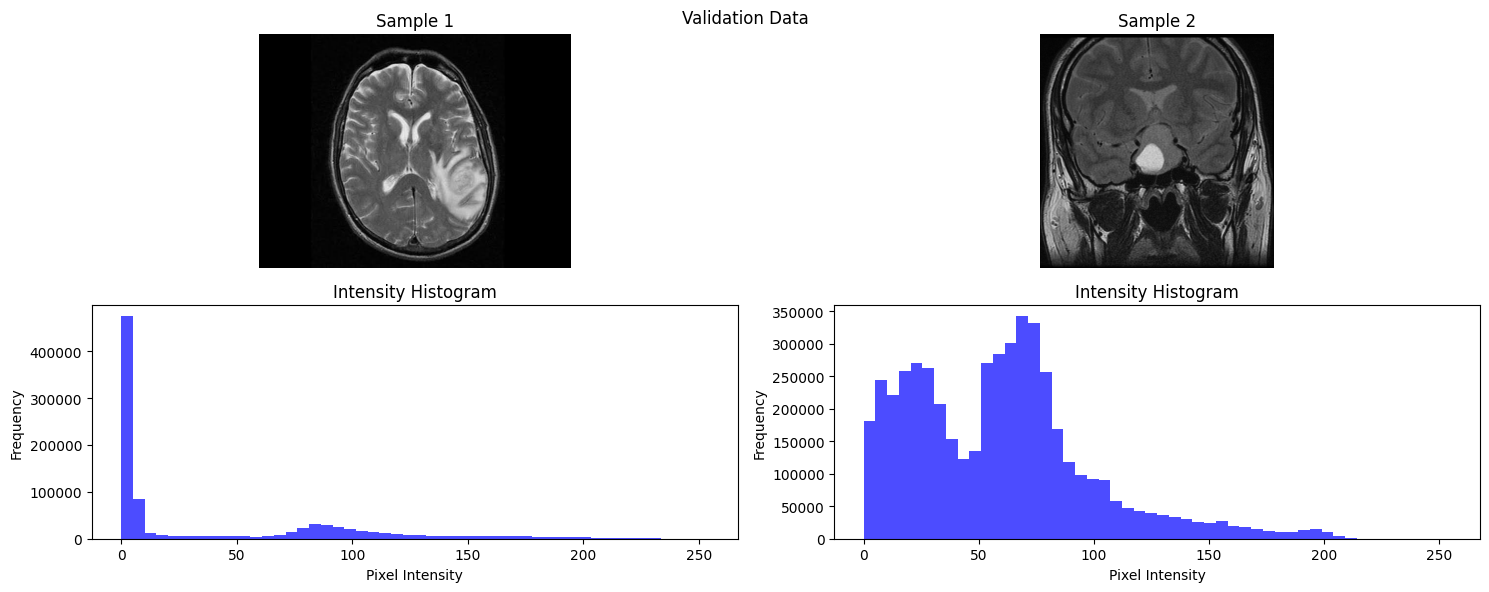

In [25]:
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Read training CSV file
train_df = pd.read_csv("/content/drive/MyDrive/f3000/preprocessed_train.csv")

# Read testing CSV file
test_df = pd.read_csv("/content/drive/MyDrive/f3000/preprocessed_test.csv")

# Read validation CSV file
validation_df = pd.read_csv("/content/drive/MyDrive/f3000/preprocessed_validation.csv")

# Concatenate training and testing DataFrames
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Assuming the column containing image paths is named 'Original_Image_Path' (adjust accordingly)
image_paths_column = 'Original_Image_Path'

# Define function to visualize images and histograms
def visualize_images_and_histograms(df, title):
    # Extract image paths
    image_paths = df[image_paths_column]

    # Number of samples to display
    num_samples = min(2, len(df))

    # Create subplots for images and histograms
    fig, axs = plt.subplots(2, num_samples, figsize=(15, 6))

    # Display images and histograms
    for i, image_path in enumerate(image_paths[:num_samples]):
        # Load image using SimpleITK
        image = sitk.ReadImage(image_path)

        # Convert image to NumPy array for visualization
        img_array = sitk.GetArrayFromImage(image)

        # Plot image
        axs[0, i].imshow(img_array, cmap='gray')
        axs[0, i].set_title(f'Sample {i+1}')
        axs[0, i].axis('off')

        # Plot histogram
        axs[1, i].hist(img_array.flatten(), bins=50, color='b', alpha=0.7)
        axs[1, i].set_title(f'Intensity Histogram')
        axs[1, i].set_xlabel('Pixel Intensity')
        axs[1, i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()

# Visualize images and histograms for training data
visualize_images_and_histograms(train_df, title="Training Data")

# Visualize images and histograms for testing data
visualize_images_and_histograms(test_df, title="Testing Data")

# Visualize images and histograms for validation data
visualize_images_and_histograms(validation_df, title="Validation Data")


In [27]:
import tensorflow as tf

class CapsuleLayer(tf.keras.layers.Layer):
    def __init__(self, num_capsules, capsule_dim, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.capsule_dim = capsule_dim
        self.routings = routings

    def build(self, input_shape):
        self.input_num_capsules = input_shape[1]
        self.input_capsule_dim = input_shape[2]
        self.W = self.add_weight(shape=[self.input_num_capsules, self.num_capsules, self.input_capsule_dim, self.capsule_dim], initializer='glorot_uniform', trainable=True)

    def call(self, inputs, training=None):
        inputs_expand = tf.expand_dims(tf.expand_dims(inputs, 1), -1)
        inputs_tiled = tf.tile(inputs_expand, [1, self.num_capsules, 1, 1, 1])
        inputs_hat = tf.squeeze(tf.map_fn(lambda x: tf.matmul(self.W, x), elems=inputs_tiled))
        b = tf.zeros([inputs.shape[0], self.num_capsules, self.input_num_capsules])

        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s = tf.reduce_sum(tf.multiply(c[:,:, :, None], inputs_hat), axis=2)
            v = self.squash(s)
            b += tf.reduce_sum(tf.multiply(v[:,:, None, :], inputs_hat), axis=3)

        return v

    def squash(self, s):
        s_norm = tf.norm(s, axis=-1, keepdims=True)
        s_norm_squared = s_norm ** 2
        squash_factor = s_norm_squared / (1 + s_norm_squared)
        v = squash_factor * s / s_norm
        return v

class CapsNet(tf.keras.Model):
    def __init__(self, input_shape, num_classes, **kwargs):
        super(CapsNet, self).__init__(**kwargs)
        self.conv1 = tf.keras.layers.Conv2D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', name='conv1')
        self.primary_capsules = CapsuleLayer(num_capsules=32, capsule_dim=8, routings=3, name='primary_capsules')
        self.digit_capsules = CapsuleLayer(num_capsules=num_classes, capsule_dim=16, routings=3, name='digit_capsules')
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs, training=None):
        x = self.conv1(inputs)
        x = self.primary_capsules(x)
        x = self.digit_capsules(x)
        x = self.flatten(x)
        x = self.dense(x)
        return x

In [30]:
# Define the Capsule Network model
def CapsNet(input_shape, num_classes):
    x = layers.Input(shape=input_shape)

    # Load Xception model with pre-trained weights
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape, pooling='max')

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Convolutional layer
    conv1 = layers.Conv2D(filters=299, kernel_size=9, strides=1, padding='valid', activation='relu')(x)

    # Primary Capsule layer
    output_shape = (142, 142, 299)
    primary_capsules = layers.Conv2D(filters=299, kernel_size=9, strides=2, padding='valid')(conv1)
    primary_capsules = layers.Reshape(output_shape)(primary_capsules)

    return models.Model(inputs=x, outputs=primary_capsules)


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K

# Define the Squash activation function
def squash(vectors, axis=-1):
    squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = squared_norm / (1 + squared_norm) / K.sqrt(squared_norm + K.epsilon())
    return scale * vectors

# Define the CapsuleLayer
class CapsuleLayer(layers.Layer):
    def _init_(self, num_capsules, capsule_dim, num_routing=3, **kwargs):
        super(CapsuleLayer, self)._init_(**kwargs)
        self.num_capsules = num_capsules
        self.capsule_dim = capsule_dim
        self.num_routing = num_routing

    def build(self, input_shape):
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]
        self.W = self.add_weight(shape=[self.num_capsules, self.input_num_capsule, self.capsule_dim, self.input_dim_capsule],
                                 initializer='glorot_uniform',
                                 trainable=True)

    def call(self, inputs):
        # Expand dims to prepare for tiling
        inputs_expand = K.expand_dims(inputs, 1)
        # Tile inputs to match the shape of W
        inputs_tiled = K.tile(inputs_expand, [1, self.num_capsules, 1, 1])

        # Compute inputs * W using batch_dot
        inputs_hat = K.map_fn(lambda x: K.batch_dot(x, self.W, [2, 3]), elems=inputs_tiled)

        # Initialize routing logits to zeros
        b = tf.zeros(shape=[K.shape(inputs_hat)[0], self.num_capsules, self.input_num_capsule])

        # Dynamic routing
        for i in range(self.num_routing):
            # Apply softmax to compute routing probabilities
            c = tf.nn.softmax(b, axis=1)
            # Perform weighted sum of inputs_hat
            outputs = squash(K.batch_dot(c, inputs_hat, [2, 3]))
            # Update routing logits
            if i < self.num_routing - 1:
                # Compute agreement
                agreement = K.batch_dot(outputs, inputs_hat, [3, 2])
                # Update routing logits
                b += agreement

        return outputs

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsules, self.capsule_dim)

# Define the Capsule Network model
def CapsNet(input_shape, num_classes):
    x = layers.Input(shape=input_shape)

    # Load Xception model with pre-trained weights
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape, pooling='max')

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Convolutional layer
    conv1 = layers.Conv2D(filters=299, kernel_size=9, strides=1, padding='valid', activation='relu')(x)

    # Primary Capsule layer
    output_shape = (142, 142, 299)

    primary_capsules = layers.Conv2D(filters=299, kernel_size=9, strides=2, padding='valid')(conv1)
    primary_capsules = layers.Reshape(output_shape)(primary_capsules)

    return model

# Build the Capsule Network model
input_shape = (299, 299, 3)
num_classes = 4
model = CapsNet(input_shape, num_classes)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Print model summary
model.summary()

# Assuming tr_gen and valid_gen are your training and validation data generators
# model.fit(tr_gen, validation_data=valid_gen, epochs=num_epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 2627

In [32]:
# Train the model
hist = model.fit(
    tr_gen,
    epochs=5,
    validation_data=valid_gen,
    shuffle=False
)


Epoch 1/5
90/90 [==============================] - 52s 434ms/step - loss: 1.1361 - accuracy: 0.5774 - precision_1: 0.6420 - recall_1: 0.4861 - val_loss: 1.1640 - val_accuracy: 0.5941 - val_precision_1: 0.6364 - val_recall_1: 0.4505
Epoch 2/5
90/90 [==============================] - 30s 332ms/step - loss: 0.7130 - accuracy: 0.7122 - precision_1: 0.7676 - recall_1: 0.6561 - val_loss: 1.0283 - val_accuracy: 0.6040 - val_precision_1: 0.6387 - val_recall_1: 0.4901
Epoch 3/5
90/90 [==============================] - 30s 334ms/step - loss: 0.5946 - accuracy: 0.7634 - precision_1: 0.7984 - recall_1: 0.7118 - val_loss: 1.1559 - val_accuracy: 0.6040 - val_precision_1: 0.6464 - val_recall_1: 0.5792
Epoch 4/5
90/90 [==============================] - 31s 338ms/step - loss: 0.5321 - accuracy: 0.7819 - precision_1: 0.8147 - recall_1: 0.7491 - val_loss: 1.0281 - val_accuracy: 0.6188 - val_precision_1: 0.6464 - val_recall_1: 0.5792
Epoch 5/5
90/90 [==============================] - 30s 329ms/step - loss

In [33]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

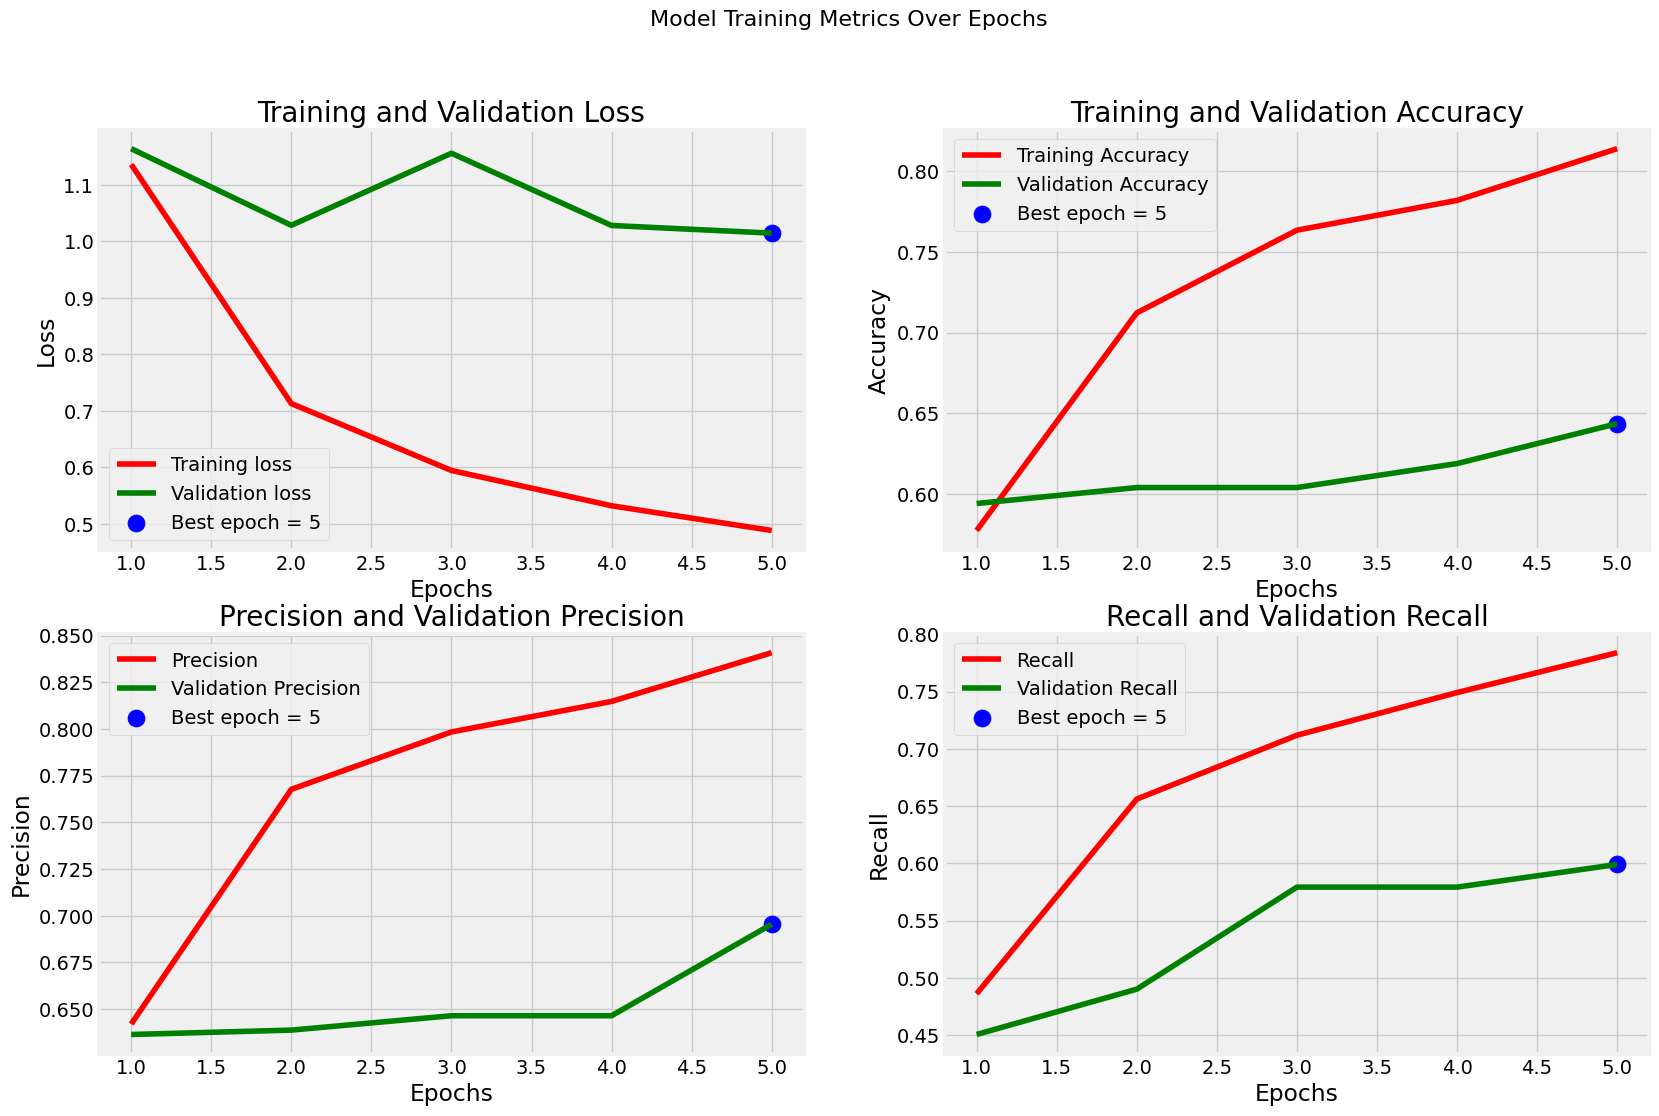

In [35]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision_1']
tr_recall = hist.history['recall_1']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision_1']
val_recall = hist.history['val_recall_1']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [36]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

13/13 [==============================] - 5s 121ms/step - loss: 0.9911 - accuracy: 0.6386 - precision_1: 0.6919 - recall_1: 0.5891
Train Loss: 0.3443
Train Accuracy: 87.21%
--------------------
Validation Loss: 1.0185
Validation Accuracy: 63.86%
--------------------
Test Loss: 0.9911
Test Accuracy: 63.86%


In [37]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

13/13 [==============================] - 2s 110ms/step


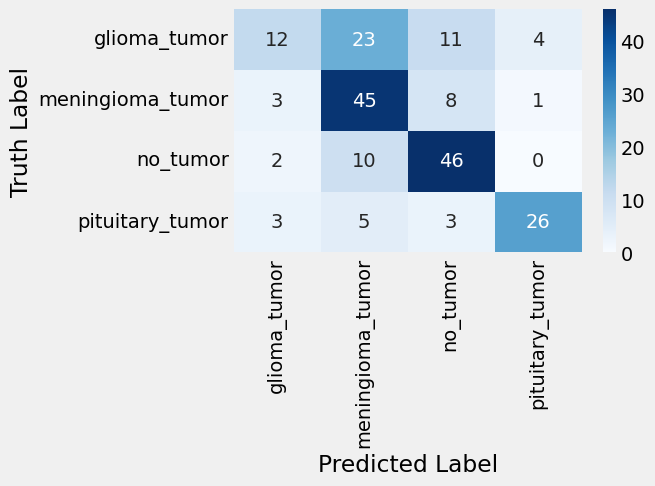

In [38]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [39]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.60      0.24      0.34        50
           1       0.54      0.79      0.64        57
           2       0.68      0.79      0.73        58
           3       0.84      0.70      0.76        37

    accuracy                           0.64       202
   macro avg       0.66      0.63      0.62       202
weighted avg       0.65      0.64      0.62       202



In [40]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(7,5))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 [==============================] - 2s 2s/step


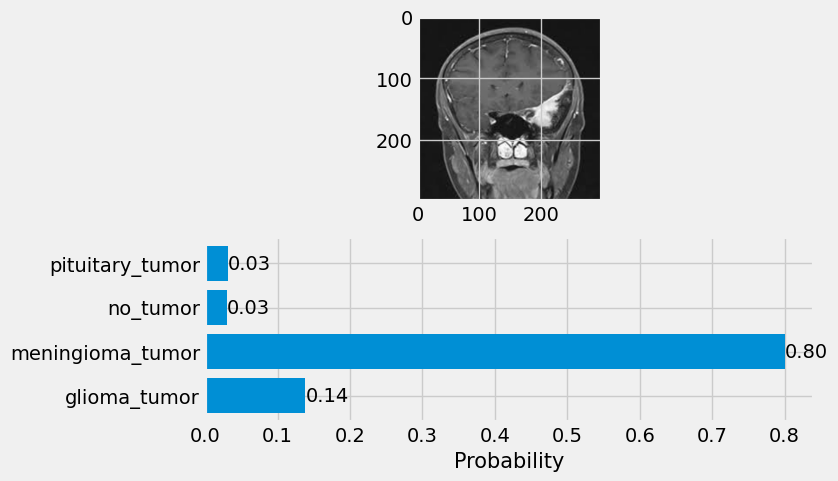

In [41]:
predict('/content/drive/MyDrive/f3000/Testing/meningioma_tumor/image(102).jpg')

1/1 [==============================] - 0s 408ms/step


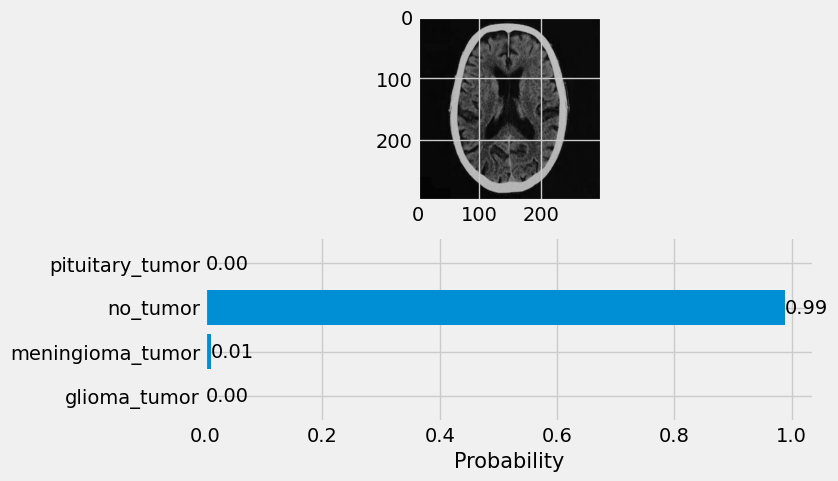

In [ ]:
predict('/content/drive/MyDrive/f3000/Testing/no_tumor/image(103).jpg')

1/1 [==============================] - 1s 743ms/step


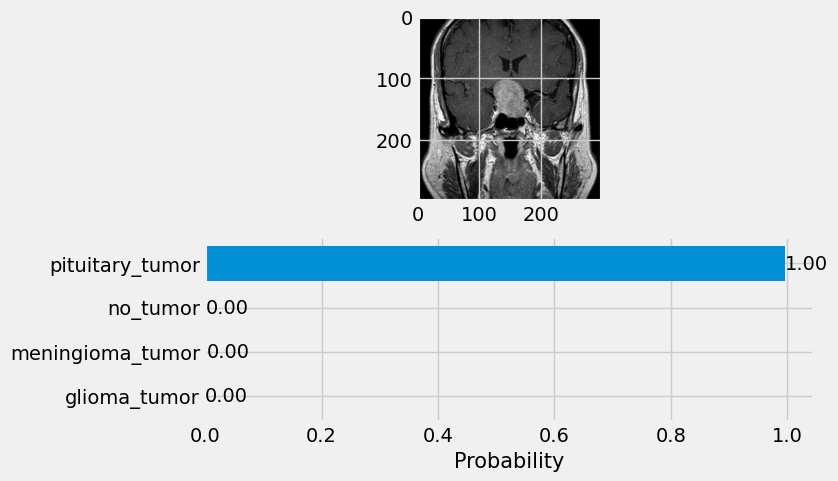

In [ ]:
predict('/content/drive/MyDrive/f3000/Testing/pituitary_tumor/image(11).jpg')

1/1 [==============================] - 1s 723ms/step


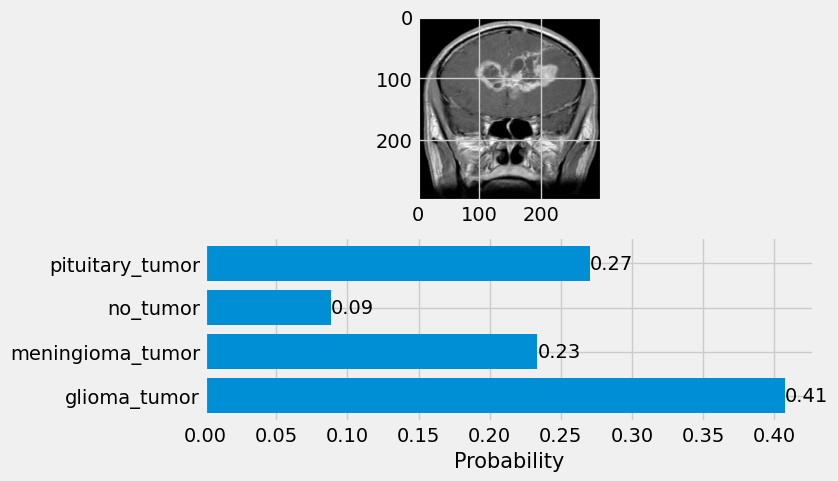

In [ ]:
predict('/content/drive/MyDrive/f3000/Testing/glioma_tumor/image.jpg')